In [1]:
import os, sys
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(parent_dir)

In [2]:
import networkx as nx
undirected_graph = nx.Graph()
directed_graph = nx.DiGraph()

f = open('net_2', 'r')

for line in f:
    line = line.split()
    undirected_graph.add_edge(int(line[0]), int(line[1]))
    directed_graph.add_edge(int(line[0]), int(line[1]))
    
f.close()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from social_network_algorithms.mining.triangles import clustering_coefficient
from social_network_algorithms.mining.diameter import stream_diam

class Analyzer:
    
    def __init__(self, network):
        self.network = network
        
    def get_degree_distribution(self):
        "Returns the plot of the degree distribution with a log-log scale"
        
        N = self.network.number_of_nodes()
        degrees = [self.network.in_degree(n) for n in self.network.nodes()] if self.network.is_directed() else [self.network.degree(n) for n in self.network.nodes()]
        
        N_k = {k: 0 for k in range(max(degrees) + 1)}
        for k in degrees:
            N_k[k] += 1
                
        p_k = {}
        for k in N_k:
            p_k[k] = N_k[k] / N
        
        # Plotting in log-log scale
        plt.figure(figsize=(8, 6))
        plt.loglog(list(p_k.keys()), list(p_k.values()), marker='o', linestyle='None', color='b')
        plt.title('Log-log Degree Distribution')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        return plt
    
    def get_diameter(self):
        return stream_diam(self.network)
    
    def get_clustering_coefficient(self):
        return clustering_coefficient(self.network)

In [5]:
analyzer1 = Analyzer(undirected_graph)
analyzer2 = Analyzer(directed_graph)

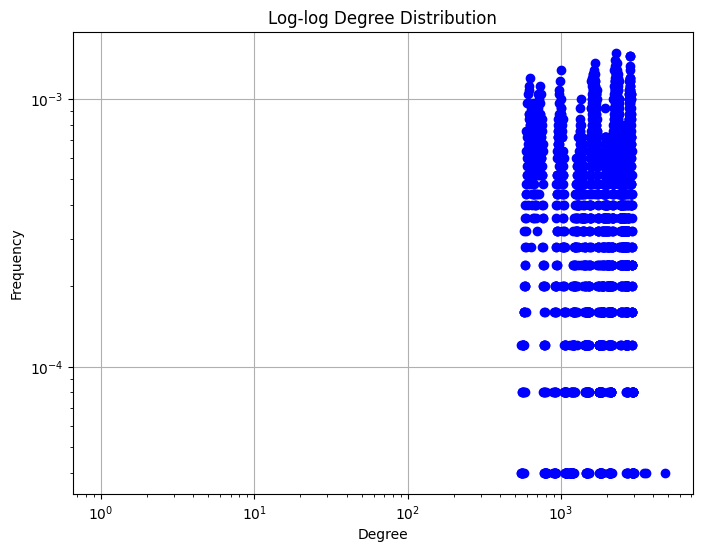

In [7]:
# plt = analyzer1.get_degree_distribution()
# plt.show()

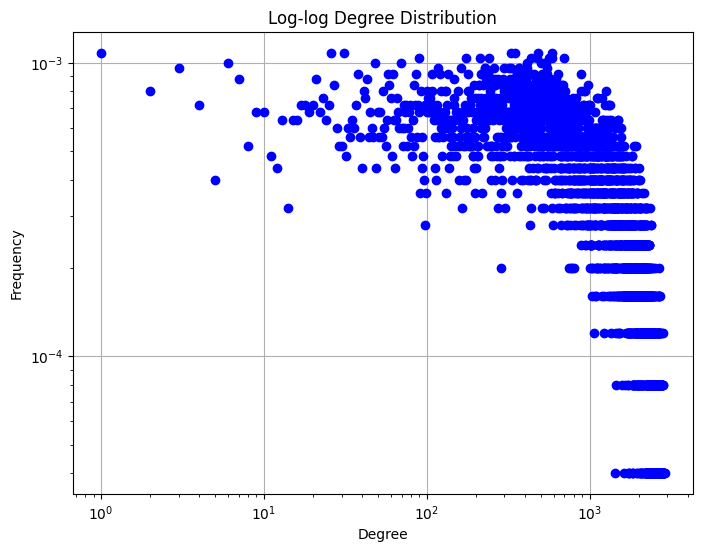

In [8]:
# plt = analyzer2.get_degree_distribution()
# plt.show()

## Diameter

In [ ]:
print('Undirected Graph')
print('Diameter: ', analyzer1.get_diameter())
_, avg_clustering_coefficient = analyzer1.get_clustering_coefficient()
print('Clustering Coefficient: ', avg_clustering_coefficient)

print('Directed Graph')
print('Diameter: ', analyzer2.get_diameter())
_, avg_clustering_coefficient = analyzer2.get_clustering_coefficient()
print('Clustering Coefficient: ', avg_clustering_coefficient)